# Face Recognition

- Install library (OpenCV Contrib)

In [1]:
! pip install opencv-contrib-python

- Install library Scikit-Learn

In [2]:
! pip install scikit-learn

- Install Itertools

In [3]:
! pip install more-itertools

- Import library

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Menyiapkan dataset

In [30]:
def show_dataset(images_class, label):
    # show data for 1 class
    plt.figure(figsize=(14,5))
    k = 0
    for i in range(1,6):
        plt.subplot(1,5,i)
        try :
            plt.imshow(images_class[k][:,:,::-1])
        except :
            plt.imshow(images_class[k], cmap='gray')
        plt.title(label)
        plt.axis('off')
        plt.tight_layout()
        k += 1
    plt.show()

In [31]:
dataset_folder = "my_face/"

names = []
images = []
for folder in os.listdir(dataset_folder):
    for name in os.listdir(os.path.join(dataset_folder, folder))[:70]: # limit only 70 face per class
        img = cv2.imread(os.path.join(dataset_folder + folder, name))
        images.append(img)
        names.append(folder)

In [32]:
labels = np.unique(names)

labels

array(['Dela', 'Kinata', 'Mulki', 'Pascalis'], dtype='<U8')

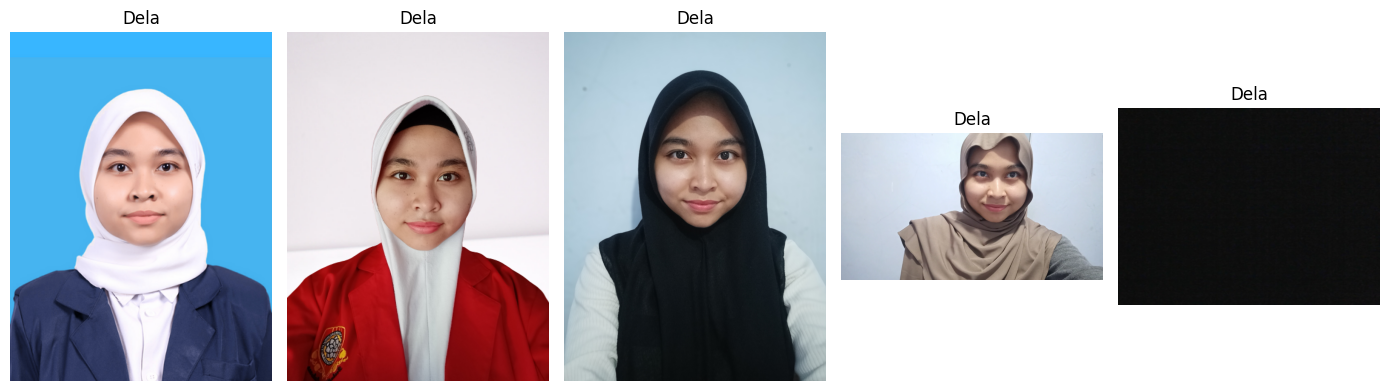

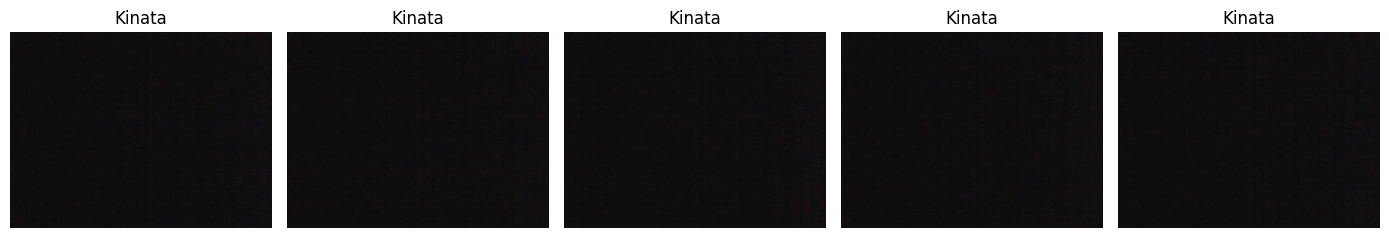

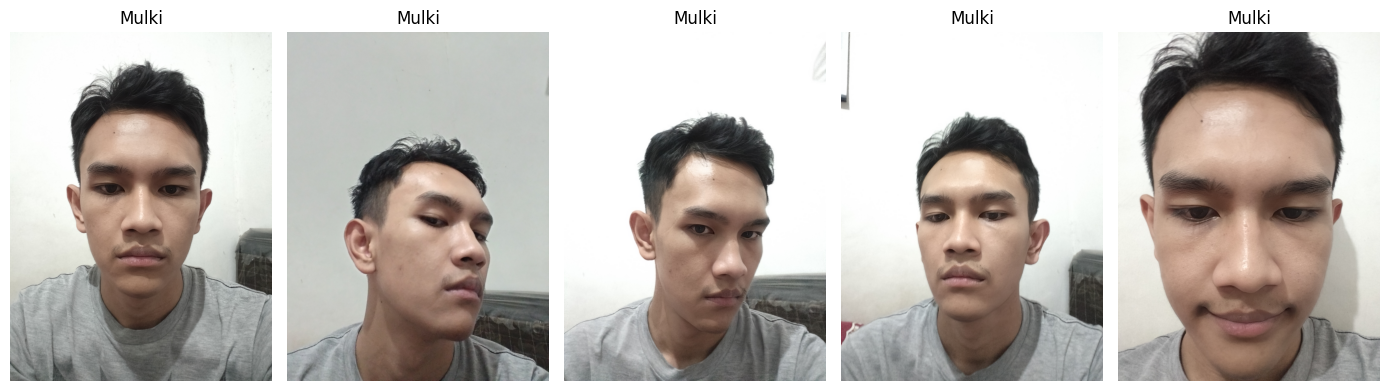

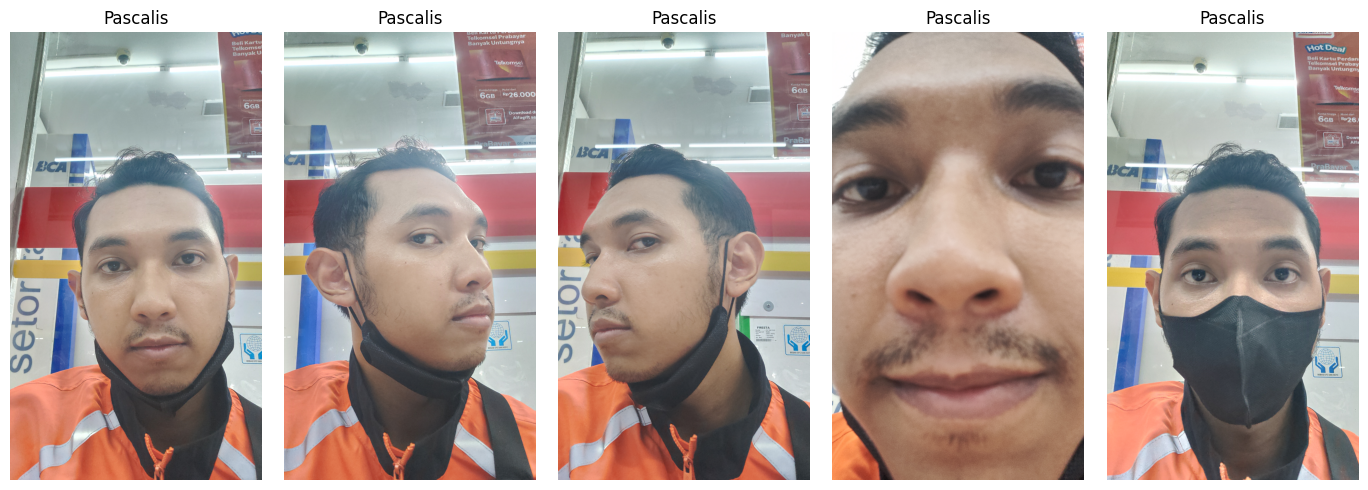

In [33]:
for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class = images[ids[0] : ids[-1] + 1]
    show_dataset(images_class, label)

- crop, resize & convert ke grayscale untuk deteksi area wajah menggunakan **cascade classifier**

In [34]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [35]:
def detect_face(img, idx):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    try :
        x, y, w, h = faces[0]

        img = img[y:y+h, x:x+w]
        img = cv2.resize(img, (100, 100))
    except :
        print("Face not found in image index", i)
        img = None
    return img

In [38]:
croped_images = []
for i, img in enumerate(images) :
    img = detect_face(img, i)
    if img is not None :
        croped_images.append(img)
    else :
        del names[i]

Face not found in image index 4
Face not found in image index 5
Face not found in image index 6
Face not found in image index 7
Face not found in image index 8
Face not found in image index 9
Face not found in image index 10
Face not found in image index 11
Face not found in image index 12
Face not found in image index 13
Face not found in image index 14
Face not found in image index 15


IndexError: list assignment index out of range

IndexError: list index out of range

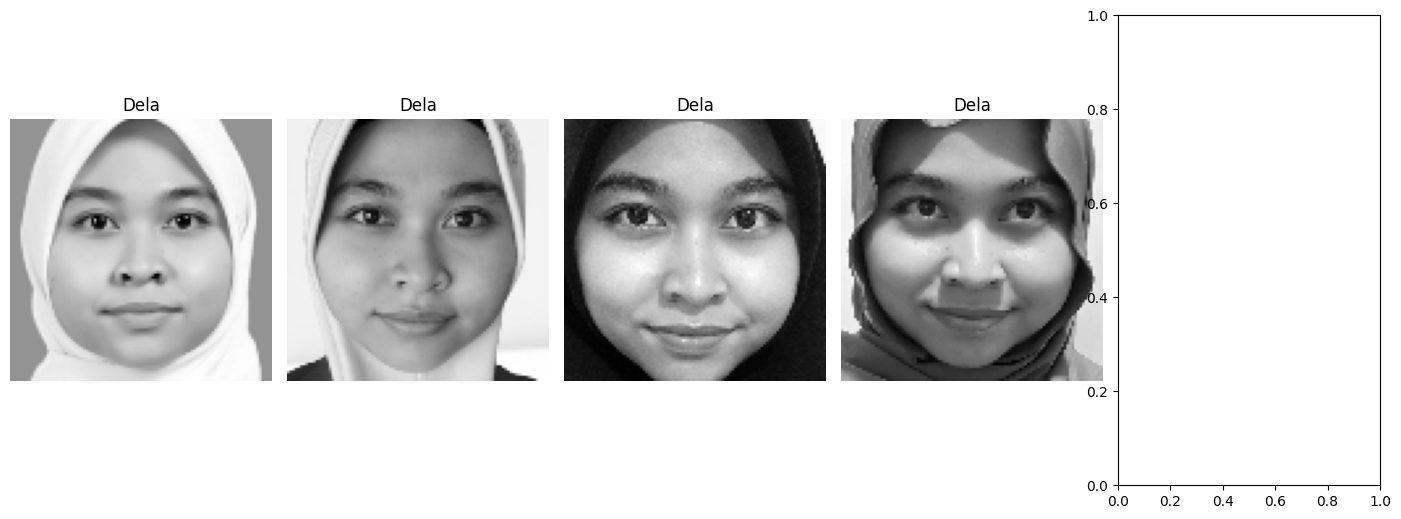

In [39]:
for label in labels:
    
    ids = np.where(label== np.array(names))[0]
    images_class = croped_images[ids[0] : ids[-1] + 1] # select croped images for each class
    show_dataset(images_class, label)

- encoding nama

In [40]:
names

['Dela',
 'Dela',
 'Dela',
 'Dela',
 'Dela',
 'Kinata',
 'Kinata',
 'Mulki',
 'Mulki',
 'Mulki',
 'Pascalis',
 'Pascalis',
 'Pascalis',
 'Pascalis']

In [41]:
print(labels)

['Dela' 'Kinata' 'Mulki' 'Pascalis']


In [42]:
name_vec = np.array([np.where(name == labels)[0][0] for name in names])

In [43]:
print(name_vec)

[0 0 0 0 0 1 1 2 2 2 3 3 3 3]


#### Buat Model Face recognition

In [44]:
model = cv2.face.LBPHFaceRecognizer_create()

In [45]:
model.train(croped_images, name_vec)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv_contrib\modules\face\src\lbph_faces.cpp:375: error: (-5:Bad argument) The number of samples (src) must equal the number of labels (labels). Was len(samples)=4, len(labels)=0. in function 'cv::face::LBPH::train'


- simpan & load model

In [46]:
model.save("lbph_model.yml")

In [47]:
model.read("lbph_model.yml")

- Test Model

In [49]:
path = "test/Pascalis_0000.jpg"
 
img = cv2.imread(path)
img = detect_face(img, 0)

idx, confidence = model.predict(img)
 
print("Found: ", labels[idx])
print("Confidence: ", confidence)

plt.figure()
plt.imshow(img, cmap="gray")
plt.axis(False)
plt.show()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv_contrib\modules\face\src\lbph_faces.cpp:406: error: (-5:Bad argument) This LBPH model is not computed yet. Did you call the train method? in function 'cv::face::LBPH::predict'


- Terapkan ke semua Test dataset

Actual 	:  Colin_Powell_0115.jpg
Predic 	:  Colin_Powell
Confidence 	:  0.0


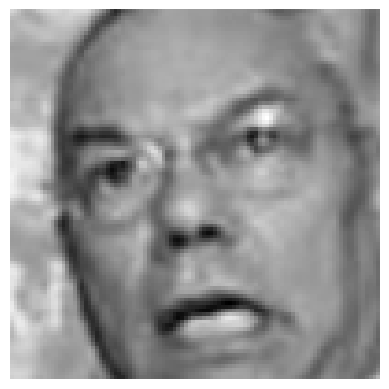

Actual 	:  Colin_Powell_0116.jpg
Predic 	:  Colin_Powell
Confidence 	:  0.0


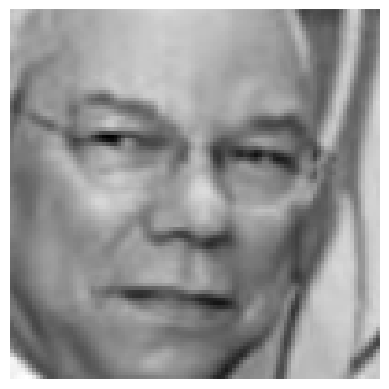

Actual 	:  Colin_Powell_0117.jpg
Predic 	:  Colin_Powell
Confidence 	:  0.0


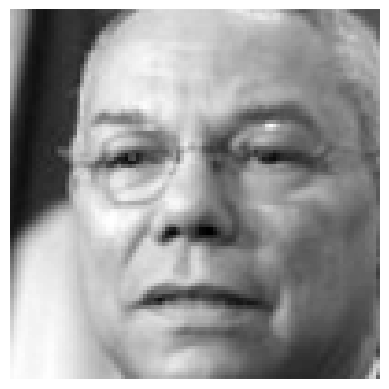

Actual 	:  Colin_Powell_0118.jpg
Predic 	:  Colin_Powell
Confidence 	:  0.0


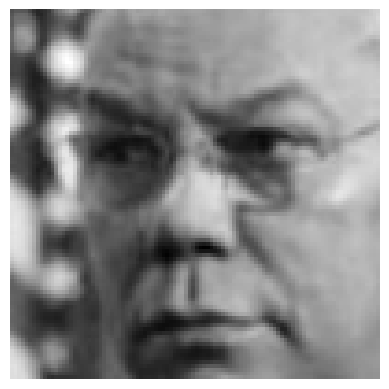

Actual 	:  Colin_Powell_0119.jpg
Predic 	:  Colin_Powell
Confidence 	:  0.0


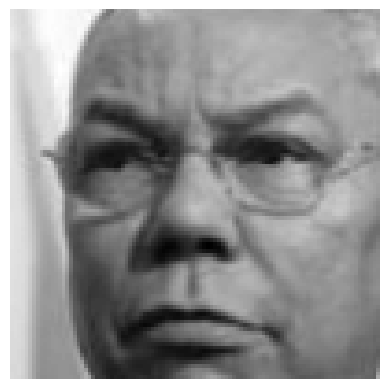

Actual 	:  Donald_Rumsfeld_0017.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  0.0


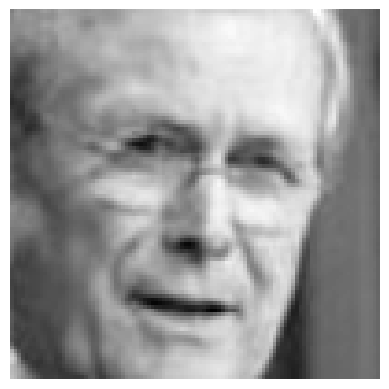

Actual 	:  Donald_Rumsfeld_0064.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  0.0


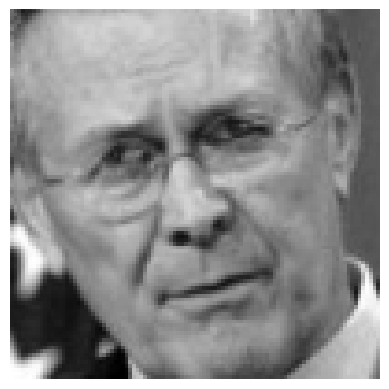

Actual 	:  Donald_Rumsfeld_0090.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  0.0


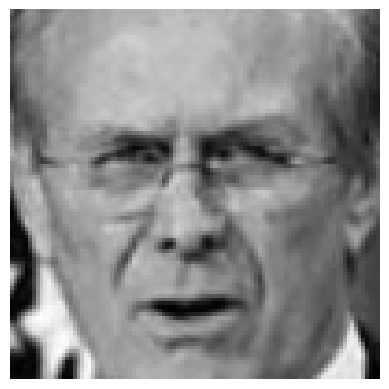

Actual 	:  Donald_Rumsfeld_0097.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  0.0


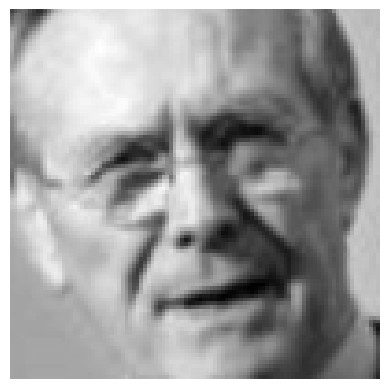

Actual 	:  Donald_Rumsfeld_0105.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  83.14840674910977


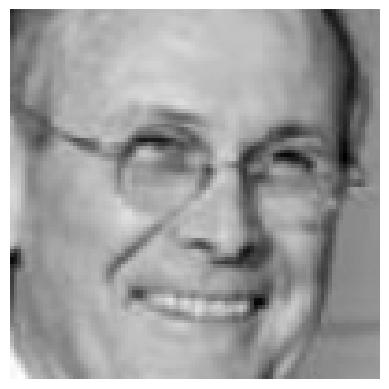

Actual 	:  George_W_Bush_0194.jpg
Predic 	:  George_W_Bush
Confidence 	:  78.23153573987372


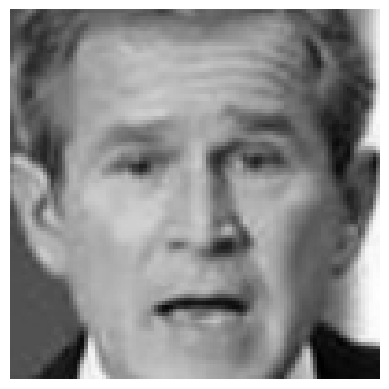

Actual 	:  George_W_Bush_0195.jpg
Predic 	:  George_W_Bush
Confidence 	:  78.26353234476271


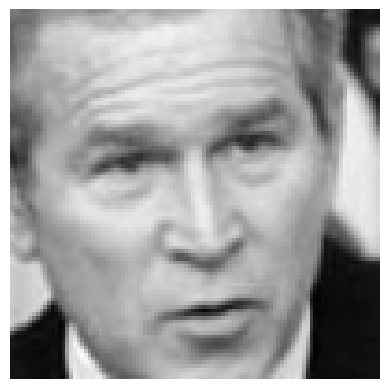

Actual 	:  George_W_Bush_0197.jpg
Predic 	:  George_W_Bush
Confidence 	:  83.24428685471469


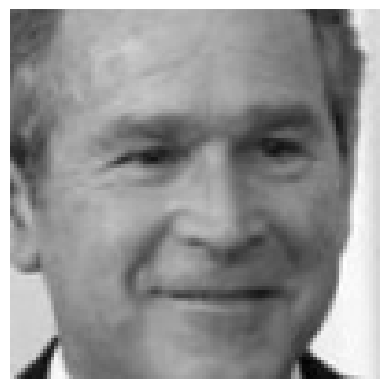

Actual 	:  George_W_Bush_0207.jpg
Predic 	:  George_W_Bush
Confidence 	:  69.25756609195612


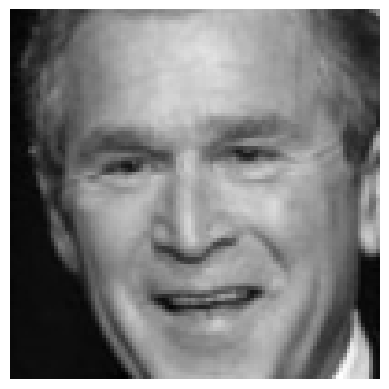

Actual 	:  George_W_Bush_0209.jpg
Predic 	:  George_W_Bush
Confidence 	:  67.4571943392215


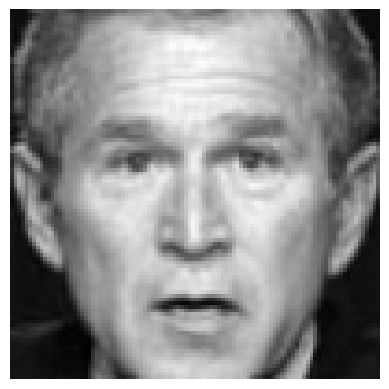

Actual 	:  Gerhard_Schroeder_0081.jpg
Predic 	:  Gerhard_Schroeder
Confidence 	:  0.0


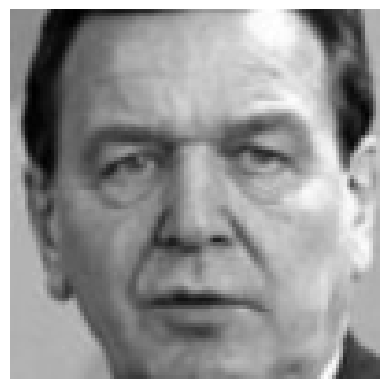

Actual 	:  Gerhard_Schroeder_0084.jpg
Predic 	:  Gerhard_Schroeder
Confidence 	:  0.0


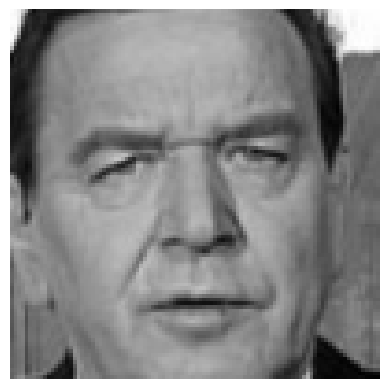

Actual 	:  Gerhard_Schroeder_0091.jpg
Predic 	:  Gerhard_Schroeder
Confidence 	:  0.0


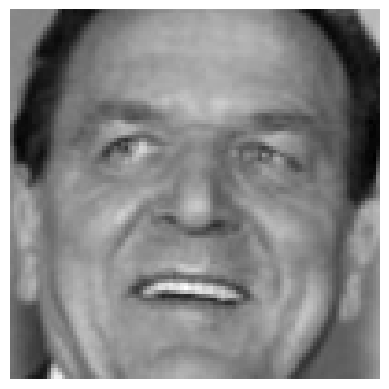

Actual 	:  Gerhard_Schroeder_0097.jpg
Predic 	:  Gerhard_Schroeder
Confidence 	:  0.0


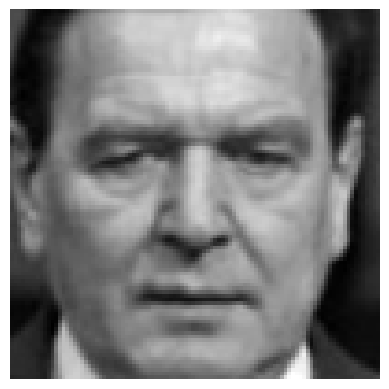

Actual 	:  Gerhard_Schroeder_0099.jpg
Predic 	:  Gerhard_Schroeder
Confidence 	:  0.0


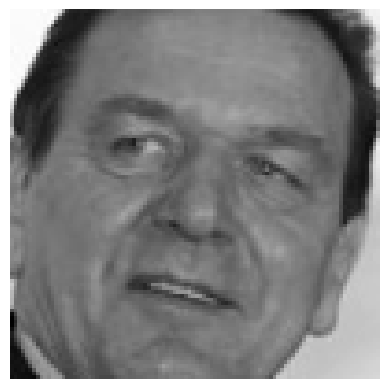

Actual 	:  Tony_Blair_0121.jpg
Predic 	:  Tony_Blair
Confidence 	:  82.91633963787804


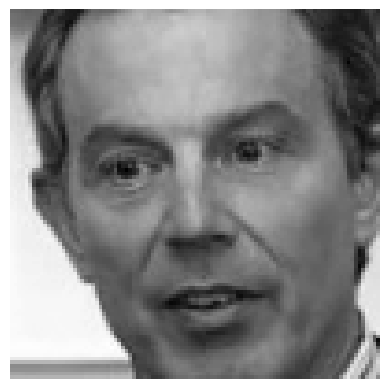

Actual 	:  Tony_Blair_0122.jpg
Predic 	:  Tony_Blair
Confidence 	:  85.77388718205535


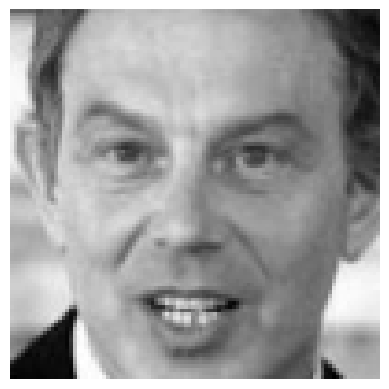

Actual 	:  Tony_Blair_0124.jpg
Predic 	:  Tony_Blair
Confidence 	:  81.37008612454139


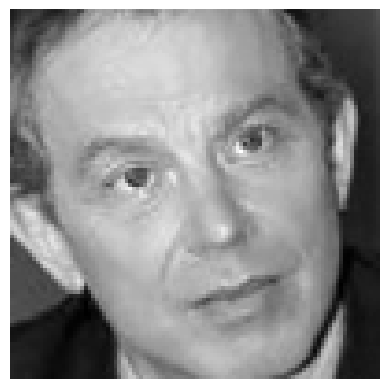

Actual 	:  Tony_Blair_0130.jpg
Predic 	:  Tony_Blair
Confidence 	:  77.35402989381915


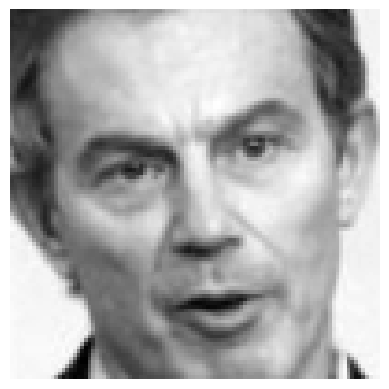

Actual 	:  Tony_Blair_0142.jpg
Predic 	:  Donald_Rumsfeld
Confidence 	:  94.55138982501609


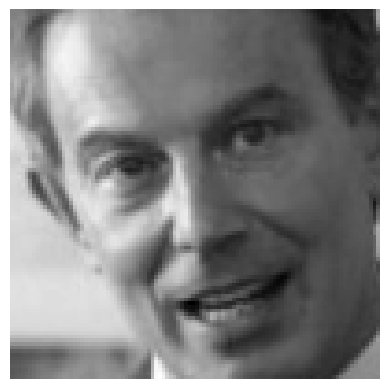

In [22]:
test_folder = "test/"
actual_names = []
predicted_names = []
confidences = []
for filename in os.listdir(test_folder):
    if filename.find(".jpg") > -1:
        path = os.path.join(test_folder, filename)
        
        img = cv2.imread(path)
        img = detect_face(img, 0)

        idx, confidence = model.predict(img)
        
        actual_names.append(np.where(filename[:-9] == labels)[0][0]) #get label from filename (remove 9 last char)
        predicted_names.append(idx)
        confidences.append(confidence)
        
        print("Actual \t: ", filename)
        print("Predic \t: ", labels[idx])
        print("Confidence \t: ", confidence)

        plt.figure()
        plt.imshow(img, cmap="gray")
        plt.axis(False)
        plt.show()

- Ringkasan hasil

In [25]:
pip install --upgrade numpy

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/d0/06/3d1ff6ed377cb0340baf90487a35f15f9dc1db8e0a07de2bf2c54a8e490f/numpy-2.2.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 217.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 217.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 217.9 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 151.3 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 163.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 180.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB 1.4 MB/s eta 0:00:10
   ---------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\DELA FARAHITA ZEIN\\anaconda3\\Lib\\site-packages\\~~mpy.libs\\libscipy_openblas64_-c16e4918366c6bc1f1cd71e28ca36fc0.dll'
Consider using the `--user` option or check the permissions.



In [26]:
pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/96/a2/cbfb5743de748d574ffdfd557e9cb29ba4f8b8a3e07836c6c176f713de2f/scikit_learn-1.6.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 330.3 kB/s eta 0:00:34
   ---------------------------------------- 0.0/11.1 MB 330.3 kB/s eta 0:00:34
   ---------------------------------------- 0.0/11.1 MB 330.3 kB/s eta 0:00:34
   ---------------------------------------- 0.0/11.1 MB 330.3 kB/s eta 0:00:34
   ---------------------------------------- 0.0/11.1 MB 330.3 kB/s eta 0:00:34
   --------------------------

In [28]:
pip uninstall numpy


^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install numpy==1.22.3


In [27]:
from sklearn.metrics import confusion_matrix

ImportError: cannot import name '_HTMLDocumentationLinkMixin' from 'sklearn.utils._estimator_html_repr' (c:\Users\DELA FARAHITA ZEIN\anaconda3\Lib\site-packages\sklearn\utils\_estimator_html_repr.py)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

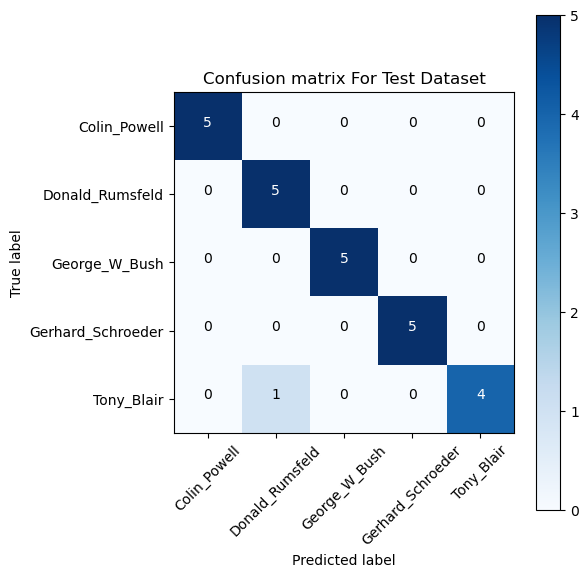

In [ ]:


# Compute confusion matrix
cnf_matrix = confusion_matrix(actual_names, predicted_names)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=labels,normalize=False,
                      title='Confusion matrix For Test Dataset')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("== Classification Report for Test Dataset ==\n")
print(classification_report(actual_names, 
                            predicted_names, 
                            target_names=labels))

== Classification Report for Test Dataset ==

                   precision    recall  f1-score   support

     Colin_Powell       1.00      1.00      1.00         5
  Donald_Rumsfeld       0.83      1.00      0.91         5
    George_W_Bush       1.00      1.00      1.00         5
Gerhard_Schroeder       1.00      1.00      1.00         5
       Tony_Blair       1.00      0.80      0.89         5

         accuracy                           0.96        25
        macro avg       0.97      0.96      0.96        25
     weighted avg       0.97      0.96      0.96        25



___
#### Tambahkan Wajah sebagai Dataset

- Buat Dataset

In [ ]:
import cv2
import os

# Daftar nama pengguna
names = ["Dela", "Kinata", "Mulki", "Pascalis"]

# Ekstensi file yang didukung
supported_formats = [".jpg", ".png"]

for name in names:
    folder_path = f"my_face/{name}"
    os.makedirs(folder_path, exist_ok=True)  # Buat folder jika belum ada

    # Hitung file dengan ekstensi yang didukung
    existing_files = [f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in supported_formats]
    i = len(existing_files)  # Mulai dari jumlah file yang ada

    cap = cv2.VideoCapture(0)  # Buka kamera
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            # Tampilkan gambar
            cv2.imshow("Capture Photo", frame)

            # Simpan gambar dalam format JPG
            output_path = f"{folder_path}/{name}_{i:04d}.jpg"
            cv2.imwrite(output_path, frame)
            print(f"Saved: {output_path}")

            # Cek tombol 'q' atau ambil maksimal 6 foto baru
            if cv2.waitKey(100) == ord('q') or i == len(existing_files) + 6:
                break
            i += 1

    cap.release()
    cv2.destroyAllWindows()


Saved: my_face/Dela/Dela_0004.jpg
Saved: my_face/Dela/Dela_0005.jpg
Saved: my_face/Dela/Dela_0006.jpg
Saved: my_face/Dela/Dela_0007.jpg
Saved: my_face/Dela/Dela_0008.jpg
Saved: my_face/Dela/Dela_0009.jpg
Saved: my_face/Dela/Dela_0010.jpg
Saved: my_face/Kinata/Kinata_0000.jpg
Saved: my_face/Kinata/Kinata_0001.jpg
Saved: my_face/Kinata/Kinata_0002.jpg
Saved: my_face/Kinata/Kinata_0003.jpg
Saved: my_face/Kinata/Kinata_0004.jpg
Saved: my_face/Kinata/Kinata_0005.jpg
Saved: my_face/Kinata/Kinata_0006.jpg
Saved: my_face/Mulki/Mulki_0005.jpg
Saved: my_face/Mulki/Mulki_0006.jpg
Saved: my_face/Mulki/Mulki_0007.jpg
Saved: my_face/Mulki/Mulki_0008.jpg
Saved: my_face/Mulki/Mulki_0009.jpg
Saved: my_face/Mulki/Mulki_0010.jpg
Saved: my_face/Mulki/Mulki_0011.jpg
Saved: my_face/Pascalis/Pascalis_0006.jpg
Saved: my_face/Pascalis/Pascalis_0007.jpg
Saved: my_face/Pascalis/Pascalis_0008.jpg
Saved: my_face/Pascalis/Pascalis_0009.jpg
Saved: my_face/Pascalis/Pascalis_0010.jpg
Saved: my_face/Pascalis/Pascalis_0

In [ ]:
import os
import cv2

# Path ke folder my_face
base_path = "D:/S5/PBL/ML/face_recognition/face_recognition/my_face"

# Loop untuk membaca semua subfolder dan file
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)

    # Cek apakah path adalah folder
    if os.path.isdir(folder_path):
        print(f"Folder: {folder_name}")

        # Loop untuk file dalam subfolder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            # Filter file berdasarkan ekstensi (jika hanya gambar)
            if file_name.endswith(('.jpg', '.png')):
                # Baca gambar dengan OpenCV
                image = cv2.imread(file_path)
                if image is not None:
                    print(f"  Memproses file: {file_path}")
                else:
                    print(f"  Gagal membaca file: {file_path}")


Folder: Dela
  Memproses file: D:/S5/PBL/ML/face_recognition/face_recognition/my_face\Dela\Dela_0000.png
  Memproses file: D:/S5/PBL/ML/face_recognition/face_recognition/my_face\Dela\Dela_0001.png
  Memproses file: D:/S5/PBL/ML/face_recognition/face_recognition/my_face\Dela\Dela_0002.jpg
  Memproses file: D:/S5/PBL/ML/face_recognition/face_recognition/my_face\Dela\Dela_0003.png
  Memproses file: D:/S5/PBL/ML/face_recognition/face_recognition/my_face\Dela\Dela_0004.jpg
  Memproses file: D:/S5/PBL/ML/face_recognition/face_recognition/my_face\Dela\Dela_0005.jpg
  Memproses file: D:/S5/PBL/ML/face_recognition/face_recognition/my_face\Dela\Dela_0006.jpg
  Memproses file: D:/S5/PBL/ML/face_recognition/face_recognition/my_face\Dela\Dela_0007.jpg
  Memproses file: D:/S5/PBL/ML/face_recognition/face_recognition/my_face\Dela\Dela_0008.jpg
  Memproses file: D:/S5/PBL/ML/face_recognition/face_recognition/my_face\Dela\Dela_0009.jpg
  Memproses file: D:/S5/PBL/ML/face_recognition/face_recognition/my

In [ ]:
! Dir dataset\

- Buat masing-masing folder di dalam folder dataset 

In [ ]:
!mkdir -p "/content/drive/MyDrive/PBL_Face Recognition/dataset/Dela" \
          "/content/drive/MyDrive/PBL_Face Recognition/dataset/Kinata" \
          "/content/drive/MyDrive/PBL_Face Recognition/dataset/Mulki" \
          "/content/drive/MyDrive/PBL_Face Recognition/dataset/Pascalis"


- Pindahkan ke masing-masing folder di folder dataset

In [ ]:
!mv "/content/drive/MyDrive/PBL_Face Recognition/my_face/Dela*" "/content/drive/MyDrive/PBL_Face Recognition/dataset/Dela/"
!mv "/content/drive/MyDrive/PBL_Face Recognition/my_face/Kinata*" "/content/drive/MyDrive/PBL_Face Recognition/dataset/Kinata/"
!mv "/content/drive/MyDrive/PBL_Face Recognition/my_face/Mulki*" "/content/drive/MyDrive/PBL_Face Recognition/dataset/Mulki/"
!mv "/content/drive/MyDrive/PBL_Face Recognition/my_face/Pascalis*" "/content/drive/MyDrive/PBL_Face Recognition/dataset/Pascalis/"


- Salin 5 file secara manual dari folder `dataset/<Your Name>` ke folder `test/`

- Jalankan ulang proses Load dataset, Training, dan Testing Model.

#### Test realtime video

In [ ]:
def draw_ped(img, label, x0, y0, xt, yt, color=(255,127,0), text_color=(255,255,255)):

    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img,
                  (x0, y0 + baseline),  
                  (max(xt, x0 + w), yt), 
                  color, 
                  2)
    cv2.rectangle(img,
                  (x0, y0 - h),  
                  (x0 + w, y0 + baseline), 
                  color, 
                  -1)  
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                0.5,                          
                text_color,                
                1,
                cv2.LINE_AA) 
    return img

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 5)
        for (x, y, w, h) in faces:
            
            face_img = gray[y:y+h, x:x+w]
            face_img = cv2.resize(face_img, (100, 100))
            
            idx, confidence = model.predict(face_img)
            label_text = "%s (%.2f %%)" % (labels[idx], confidence)
            
            frame = draw_ped(frame, label_text, x, y, x + w, y + h, color=(0,255,255), text_color=(50,50,50))
       
        cv2.imshow('Detect Face', frame)
    else :
        break
    if cv2.waitKey(10) == ord('q'):
        break
        
cv2.destroyAllWindows()
cap.release()